[-6.5         9.0472028  -1.8041958   0.10314685]


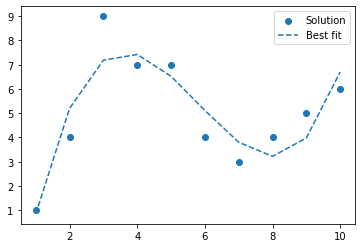

In [20]:
### Imports

import numpy as np 
import matplotlib.pyplot as plt

### Define sum functions to compute an array to a certain power


def sum_x(arr,a):
    return np.sum(arr**a)
    
    
def sum_xy(x_arr,y_arr,a):
    return np.sum(y_arr*(x_arr**a))

### Define least squares function to find coefficient of our best fit polynomial


def least_squares(x_values,y_values,n):
    '''
    Parameters
    ----------
    x_values - list of x coordinates of data points
    y_values - list of y coordinates of data points
    n - order of best fit polynomial 
    
    Objective
    ---------
    Given a set of data points, find a polynomial of best fit

    '''
    x_arr = np.array(x_values)
    y_arr = np.array(y_values)
    
    mat = np.eye(n+1)
    vector = []
    for i in range(n+1):
        for j in range(n+1):
            mat[i,j] = sum_x(x_arr,i+j)
    for k in range(n+1):
        vector += [sum_xy(x_arr,y_arr,k)]
        
    coeff = np.linalg.solve(mat,vector)
    
    ### Graphing
    
    best_fit_values = np.zeros_like(x_arr)
    for l in range(n+1):
        best_fit_values += coeff[l]*x_arr**l
    best_fit_values = np.ndarray.tolist(best_fit_values)
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,best_fit_values, linestyle='dashed')
    plt.legend(['Solution','Best fit'])
    print(coeff)

x_values = np.array([1,2,3,4,5,6,7,8,9,10],dtype='float64')
y_values = np.array([1,4,9,7,7,4,3,4,5,6],dtype='float64')
    
    
least_squares(x_values,y_values,3)

